# M5Analysis Dresslar
*CAS 520, Spring (B) 2025, Arizona State University*

### Assignment details

Step 1: First Analysis – Choose a Parameter to Explore

Step 2: Coding

Step 3: Analyze

## Step 1

Iʻm most interested in finding breakpoints where the model is barely stable so that we can best "test" the fitness of our agents. For starters, we observe that the base values of the sliders in `Farming.nlogo` are:
```
 `init-households`: 2.0
 `harvest`: 12.0
 `fission-energy`: 150.0
 `init-move-threshold`: 50.0
 `swidden-radius`: 12.0
 `farm-cost`: 3.0
 `tree-clearing-cost`: 3.0
 `move-cost`: 2.0
 `fertility-loss`: 20.0
 `fertility-restore`: 2.0
 `bad-years`: 20.0
 `max-fallow`: 20.0
 `transfer-ownership`: false
 `max_cycles`: 500.0
```

Our variables to test are: fission-energy, farm-cost, fertility-loss, fertility-restore, bad-years. Weʻll keep the rest static for now. 

#### Manual OAT observations.

We can observe that `bad-years` just dampens farming returns all the time. Its primary impact is on households/farmstead (total farmsteads appears to be almost purely a function of swidden radius); it adds as a "carrying capacity" modifier.

We might observe that `farm-cost` also does this, though it also influences decision making to a small degree. It is also exteremely harsh at high numbers. At 9.0 `farm-cost`, the system outcome is not deterministic and some runs fail to obtain stability before crashing.

`fission-energy` does not have a strong systemic impact on model outcomes on its own, though it could be imagined to be more important in our later inquiry.

When `fertility-restore` is 0, any positive `fertility-loss` will result in a system crash eventually.  However, even at 1 percent, `fertility-restore` can successfully salvage stable system outcomes for any positive value of `fertility-loss` within scale. In doing this, `fertility-loss` dampens total returns and energy in a manner similar to what is seen with higher `bad-years` values.

With all that said, letʻs take a look at some systemic runs with `farm-cost` and `fertility-loss` using BehaviorSpace. Weʻll be using some of the same code I turned in for next weekʻs assignment. For our experiment setup, weʻll use the BehaviorSpace setup with the supplied model as a guide and use ten runs per setting (some runs at some settings collapse, so to handle this we double the five runs per setting in the supplied model.)


In [15]:
import pandas as pd

csv_file = "M5Model_farm-cost-exp2-table.csv"

# read datafram in but skip 6 rows of headers
df = pd.read_csv(csv_file, skiprows=6)

param_of_interest = "farm_cost"

currency_cols = ['household_count', 'avg_fertility', 'abandoned_patches', 'died_patches', 'unused_patches', 'active_patches', 'avg_vegetation', 'fallow_patches']

# print(df.head())  # note that this is now ALL STEPS. we donʻt want that.

# letʻs create a new df_finals with only the row with the largest value for `step` for each run
# a run is really defined by the combination of all the param_of_interest and the run-number
# just for my benefit weʻll create an "index" column that is a composite of the params_of_interest and the run-number joined by "_"
# this is a little nasty.
comp_cols = [param_of_interest, 'run_number']
df_finals = df.loc[df.groupby(comp_cols)['step'].idxmax()]
df_finals['index'] = df_finals[comp_cols].apply(lambda x: '_'.join(x.astype(str)), axis=1)
#print(df_finals.shape)  # should be 10800,something (22ish)
# print(df_finals.head())

print(f"\n\n=== Statistics grouped by {param_of_interest} ===")
grouped = df_finals.groupby(param_of_interest)
# now each currency, and we just use pandas describe()
for currency in currency_cols:
    print(f"\n-- {currency} --")
    stats = grouped[currency].describe()
    print(stats)




=== Statistics grouped by farm_cost ===

-- household_count --
           count  mean       std   min    25%   50%    75%   max
farm_cost                                                       
3           10.0  76.0  9.695360  57.0  72.50  77.0  78.75  91.0
8           10.0  49.5  6.293736  42.0  44.75  49.5  53.00  62.0
9           10.0   3.1  1.911951   1.0   1.00   3.5   5.00   5.0

-- avg_fertility --
           count      mean       std       min       25%       50%       75%  \
farm_cost                                                                      
3           10.0  0.995093  0.000576  0.994359  0.994700  0.994925  0.995561   
8           10.0  0.995472  0.000428  0.994746  0.995323  0.995530  0.995691   
9           10.0  0.999619  0.000283  0.998971  0.999537  0.999580  0.999868   

                max  
farm_cost            
3          0.996032  
8          0.996240  
9          0.999912  

-- abandoned_patches --
           count  mean  std  min  25%  50%  75%  max


In [10]:
import pandas as pd

csv_file = "M5Model-fert-cost-exp-table.csv"

df = pd.read_csv(csv_file, skiprows=6)

param_of_interest = "fertility_loss"

currency_cols = ['household_count', 'avg_fertility', 'abandoned_patches', 'died_patches', 'avg_vegetation', 'fallow_patches']
comp_cols = [param_of_interest, 'run_number']
df_finals = df.loc[df.groupby(comp_cols)['step'].idxmax()]
df_finals['index'] = df_finals[comp_cols].apply(lambda x: '_'.join(x.astype(str)), axis=1)
print(f"\n\n=== Statistics grouped by {param_of_interest} ===")
grouped = df_finals.groupby(param_of_interest)
for currency in currency_cols:
    print(f"\n-- {currency} --")
    stats = grouped[currency].describe()
    print(stats)




=== Statistics grouped by fertility_loss ===

-- household_count --
                count  mean       std   min    25%   50%    75%   max
fertility_loss                                                       
10               10.0  79.1  4.581363  73.0  76.25  78.5  81.00  88.0
50               10.0  74.7  4.547282  67.0  73.00  74.5  77.75  82.0
90               10.0  68.4  5.211099  57.0  67.00  68.0  71.50  77.0

-- avg_fertility --
                count      mean       std       min       25%       50%  \
fertility_loss                                                            
10               10.0  0.998708  0.000244  0.998275  0.998620  0.998656   
50               10.0  0.969691  0.002399  0.966046  0.967532  0.970276   
90               10.0  0.914526  0.006395  0.905566  0.911231  0.913628   

                     75%       max  
fertility_loss                      
10              0.998887  0.999059  
50              0.971448  0.972885  
90              0.915253  0.929642 

So, having run each variable independently (setting all other params at system defaults), we seem to have some confirmation from our manual experimenting. 

Variable `farm-cost` has a very strong impact on the number of overall households at tick 500, with a value of 9 usually leading to system collapse before then. We can see the associated impacts on the numbers of `unused` patches, which are so set upon a house dissolution. However, `farm-cost` does not have a strong impact on vegetation quality, and in fact the impact it does have seems likely to be an outcome of simply compressing the total number of households and reducing the "field" to its natural state (when `farm-cost` is raised.)

Variable `fertility-loss` also does about what we would expect. While it does indeed somewhat impact the "carrying capacity" of the land with respect to household-per-farmstead, it has a stronger impace in particular on fertility and vegetation quality. However, at this point, I am wondering whether 500 steps is too short a time to expect stability in the patch-outcomes. Letʻs try it again with a few more runs:

In [13]:
import pandas as pd

csv_file = "M5Model-fert-loss-exp-table.csv"

# read datafram in but skip 6 rows of headers
df = pd.read_csv(csv_file, skiprows=6)

param_of_interest = "fertility_loss"

currency_cols = ['household_count', 'avg_fertility', 'abandoned_patches', 'died_patches', 'unused_patches', 'active_patches', 'avg_vegetation', 'fallow_patches']

# print(df.head())  # note that this is now ALL STEPS. we donʻt want that.

# letʻs create a new df_finals with only the row with the largest value for `step` for each run
# a run is really defined by the combination of all the param_of_interest and the run-number
# just for my benefit weʻll create an "index" column that is a composite of the params_of_interest and the run-number joined by "_"
# this is a little nasty.
comp_cols = [param_of_interest, 'run_number']
df_finals = df.loc[df.groupby(comp_cols)['step'].idxmax()]
df_finals['index'] = df_finals[comp_cols].apply(lambda x: '_'.join(x.astype(str)), axis=1)
#print(df_finals.shape)  # should be 10800,something (22ish)
# print(df_finals.head())

print(f"\n\n=== Statistics grouped by {param_of_interest} ===")
grouped = df_finals.groupby(param_of_interest)
# now each currency, and we just use pandas describe()
for currency in currency_cols:
    print(f"\n-- {currency} --")
    stats = grouped[currency].describe()
    print(stats)



=== Statistics grouped by fertility_loss ===

-- household_count --
                count  mean       std   min    25%   50%    75%   max
fertility_loss                                                       
10               10.0  77.0  6.683313  63.0  73.75  77.5  79.50  86.0
50               10.0  76.0  3.431877  71.0  73.25  75.5  79.25  81.0
90               10.0  73.3  5.558777  61.0  71.25  73.0  76.50  82.0

-- avg_fertility --
                count      mean       std       min       25%       50%  \
fertility_loss                                                            
10               10.0  0.998555  0.000165  0.998328  0.998444  0.998553   
50               10.0  0.969701  0.002172  0.965443  0.968299  0.970016   
90               10.0  0.912173  0.002993  0.906619  0.911177  0.912020   

                     75%       max  
fertility_loss                      
10              0.998620  0.998922  
50              0.971409  0.972228  
90              0.912470  0.918496 

... and, in fact, no, there is almost no difference at step 2500 in `avg_fertility` and `avg_vegatation` across our settings (10, 50, 90) for `fertility_loss`.  It was pleasingly easy to check, however!

For the purposes of spatial analysis, I did not observe many patterns versus the obvious clustering of farms within their swiddens, and the stability of "move" distances. In general, the swiddens do "tile" the domain as though through an automatic process, which is interesting given the stochasiticity of their formation. Note that my eyesight is not terrific and some of the colors/plots are difficult for me to digest.

## Step 2. Randomize

The model is modified with very fun results: `M5Model_Dresslar.nlogo`. The `Randos?` switch turns on the randomness, and the `weirdness` slider increases randomness. Itʻs pretty cool! The most notable outcome is that runs that are population-stable without randomness are changed---apparently uniformly across a large space of parameters---so that the number of households slowly creeps up and average energy slowly creeps down over thousands of steps of running. The variables themselves move somewhat consistently as well, but the very notable outcome is the Households metric.

Letʻs dig in with another experiment.

## Step 3. Analysis

The provided model includes an experiment called `randotime` that generates 10 runs each across the following matrix of settings:

```
Randos? = true
weirdness = 80
farm-cost = 3, 5, 8
```

The variables that feed into the randomizing variables are set at:

```
fission-energy = 150
swidden-radius = 12
min-fertility = 0.8
init-move-threshhold = 50
```

The multiplexing of parameters yields 30 runs in total. So that the model has time to evolve, our time limit is set to 50000 steps. We take data down every 500 steps in order to limit file size.

Here are base statistical outcomes using `household` counts as a primary currency:

In [18]:
import pandas as pd

csv_file = "M5Model_Dresslar_randotime-table.csv"

# read datafram in but skip 6 rows of headers
df = pd.read_csv(csv_file, skiprows=6)

param_of_interest = "farm_cost"

currency_cols = ["count_households","mean_fission_rate","mean_farm_dist","mean_min_fertility","mean_move_threshold","mean_vegetation"]

# print(df.head())  # note that this is now ALL STEPS. we donʻt want that.

# letʻs create a new df_finals with only the row with the largest value for `step` for each run
# a run is really defined by the combination of all the param_of_interest and the run-number
# just for my benefit weʻll create an "index" column that is a composite of the params_of_interest and the run-number joined by "_"
# this is a little nasty.
comp_cols = [param_of_interest, 'run_number']
df_finals = df.loc[df.groupby(comp_cols)['step'].idxmax()]
df_finals['index'] = df_finals[comp_cols].apply(lambda x: '_'.join(x.astype(str)), axis=1)
#print(df_finals.shape)  # should be 10800,something (22ish)
# print(df_finals.head())

print(f"\n\n=== Statistics grouped by {param_of_interest} ===")
grouped = df_finals.groupby(param_of_interest)
# now each currency, and we just use pandas describe()
for currency in currency_cols:
    print(f"\n-- {currency} --")
    stats = grouped[currency].describe()
    print(stats)



=== Statistics grouped by farm_cost ===

-- count_households --
           count   mean        std    min     25%    50%     75%    max
farm_cost                                                              
3           10.0  150.7  13.760249  132.0  142.00  147.0  156.25  178.0
5           10.0  125.8  11.399805  117.0  118.25  120.0  130.25  148.0
8           10.0   69.0  70.989827    2.0    2.00   64.0  130.50  152.0

-- mean_fission_rate --
           count      mean       std       min       25%       50%       75%  \
farm_cost                                                                      
3           10.0  1.512273  0.046593  1.440139  1.482313  1.514799  1.539468   
5           10.0  1.516887  0.090372  1.402345  1.452662  1.501122  1.579476   
8           10.0  1.776736  0.291880  1.500000  1.500000  1.732776  2.042419   

                max  
farm_cost            
3          1.597367  
5          1.676894  
8          2.159525  

-- mean_farm_dist --
           count

As expected, the count_households values here are higher than they are in the "no behavior" (randos? = false) version of the model listed above. This confirms the outcome seen in manual runs of the model where the "randomization" of behavior tends to always result in a rise of households that otherwise would be static without such behavior.

We can compare, for instance, runs with `farm-cost` of 3.0:

| randos? | households mean | households std |
|---|---|---|
| true | 150.7 | 13.7 |
| false | 76.0 |  9.7 |

Since households continue to rise steadily ver time with randomization on, the difference in households count varies by the number of steps run.

We can also observe with the "found" values for the four variables under selection pressure:

- `farm-dist` (`swidden-radius`) always increases from 12.0 over a run and tends to land, fairly reliably, around 17, with some variation depending on `farm-cost`. This is a major correction in value.

- `min-fertility` tends to drop, but appears to be quite sensitive to `farm-cost`. We might also observe that the standard deviation on these statistics are quite low.

- `move-threshhold` (`init-move-threshhold`) tends to drop a bit over time from 50, again in a way that is somewhat sensitive to `farm-cost`. A little bit of agression seems to be rewarded in lavish conditions, perhaps.

- `fission-rate` tends to stay static for `farm-cost` of 3.0 or 5.0. This might be the most interesting observation of the four! More intense analysis might investigate whether `fission-rate` is simply not enough of a determinant to survival to be selected for (this seems likely), or if there isnʻt some indirect pressure from other variables stabilizing the `fission-rate` regardless of the other changes in the model. However, something very interesting happens when `farm-cost` is 8.0. For the runs that actually survive, `fission-rate` is very high. (To confirm this see the quartile analysis.) Could higher fission rates make households more survivable in harsh conditions? Households perhaps only multiply in situations where energy is sufficient for the offspring to survive? (And could this effect be "swamped" in lower-difficulty `farm-cost` settings?) This seems like a reasonable reading, but many more fine-grained runs would be useful to confirm (along with sensitivity analysis.)

Finally, we might note that `mean_vegetation` does slowly decline over time in seeming lockstep with rising households. This is what we would expect: with more households, the land can be used (or, depending how you look at it, exploited) more efficiently, leading to a condition that may not be stable in the extremely long horizon. (>50000 steps.)



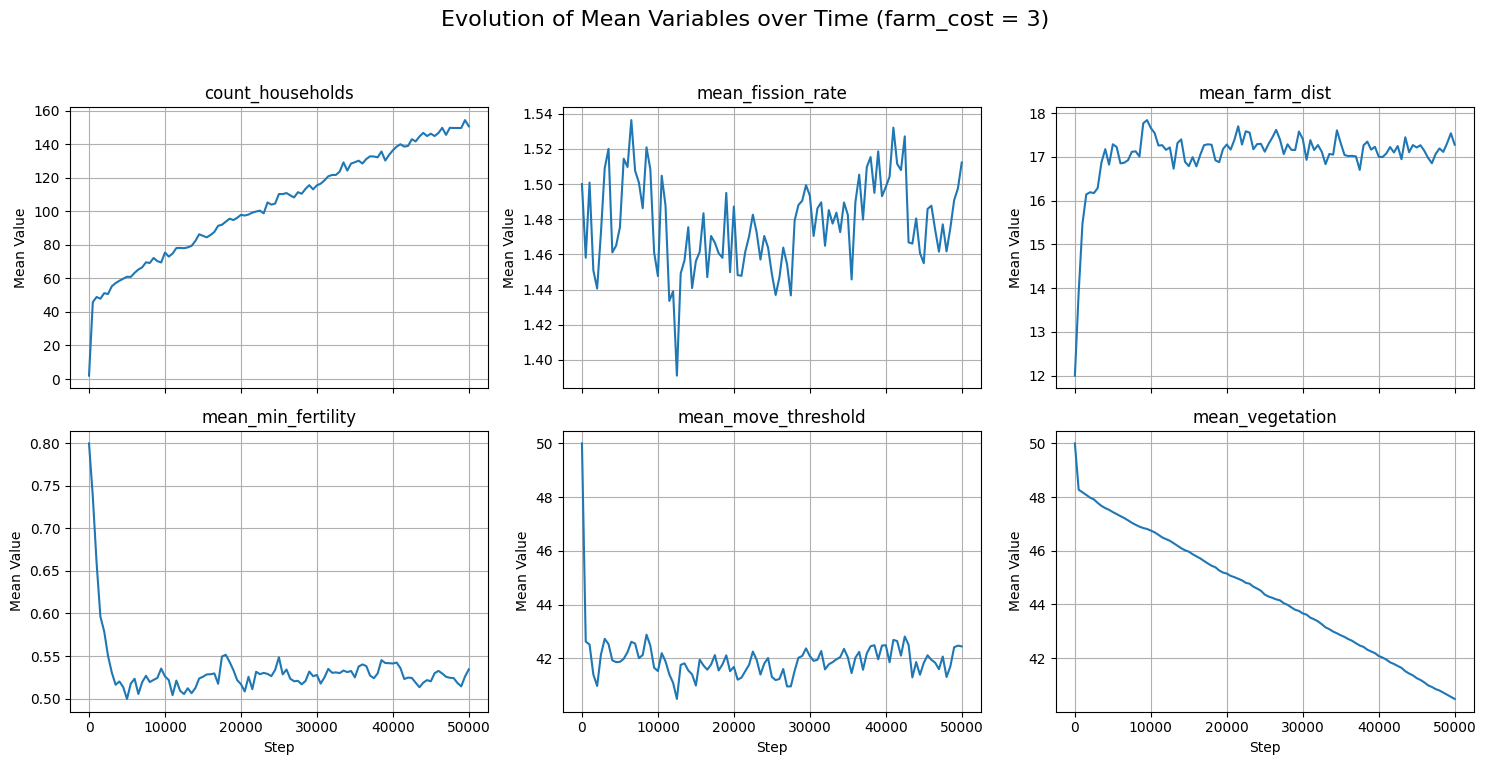

In [2]:
import os
import sys

# Add the parent directory to the Python path
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from utils.plot_utils import plot_randos_exp  # noqa

plot_randos_exp("M5Model_Dresslar_randotime-table.csv", 3)


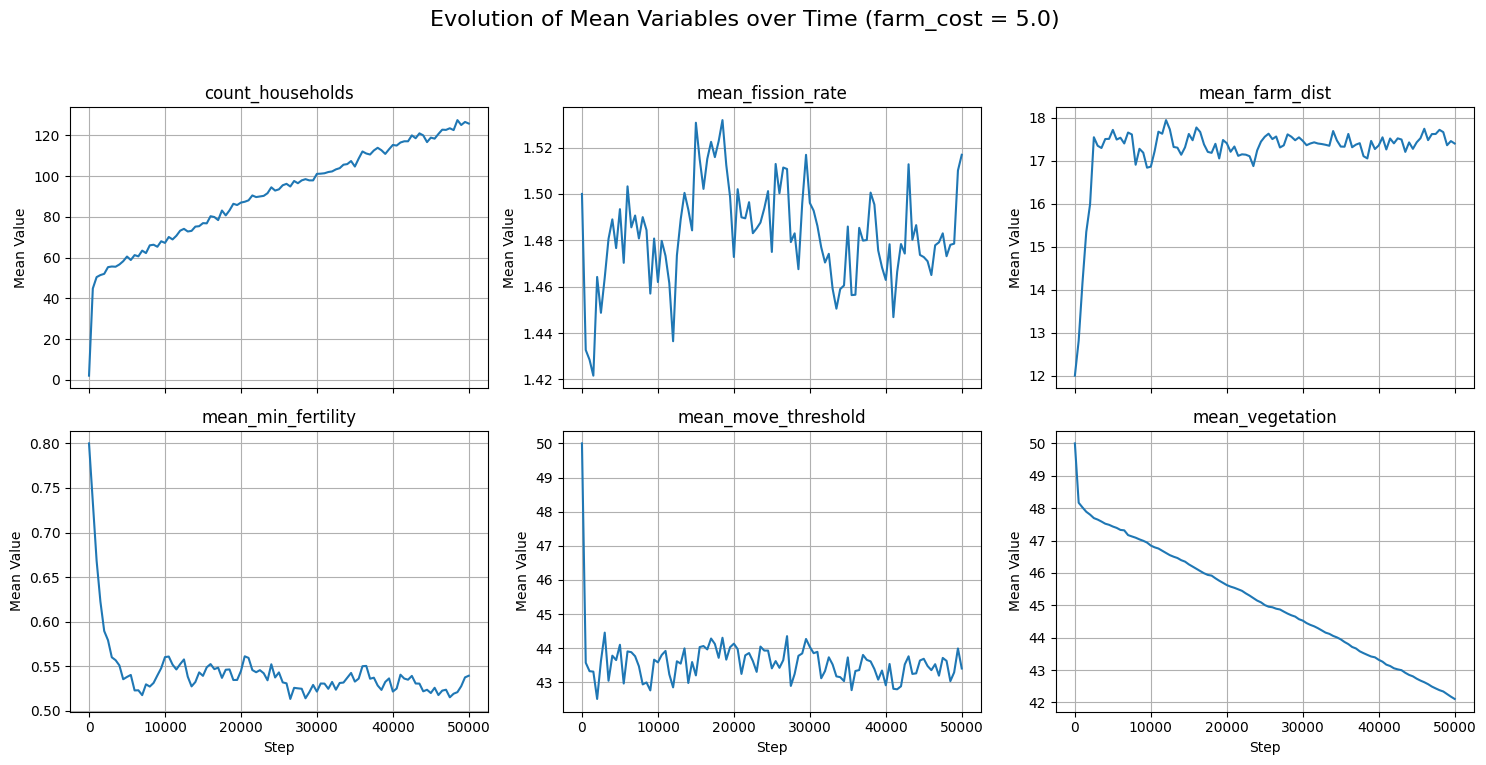

In [21]:
plot_randos_exp("M5Model_Dresslar_randotime-table.csv", 5.0)

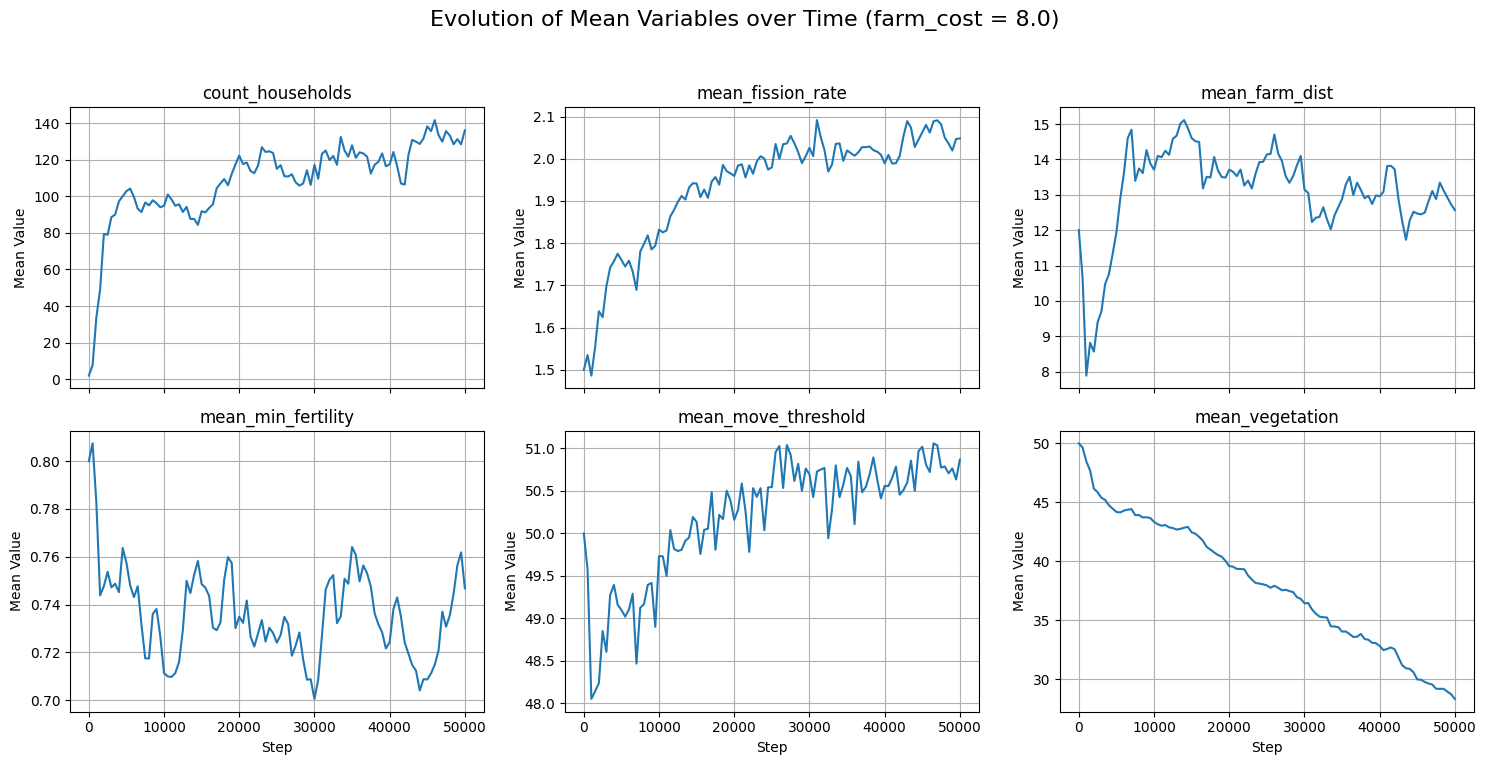

In [22]:
plot_randos_exp("M5Model_Dresslar_randotime-table.csv", 8.0)

These plots are pretty interesting! We can see a number of dynamics as mentioned above, and especially clear is the stabilization of the variables at optimals for `farm-cost` 3 and 5. (Itʻs frustrating to lack such stability at the edge case of `farm-cost = 8.0`, but an entire notebook could be written just on the phenomena around this phase transition point.)

However, thereʻs one obvious (and unfortunate) question left: what happens when `vegetation` gets too low? Here, we might note that `vegetation` is certainly a proxy for overall `fertility`; the point being the same: low fertility dampens farming outcomes. 

From other runs of the model it seems possible that household growth and vegetation disappearance would stabilize at some point, but even at 100k ticks we do not have this plateau. Weʻll do another very-long set of runs: just six since this is the number we can parallelize with confidence. If we pick a number of ticks that is too low, weʻll regret it, but we can try 250k.

--

EDITORIAL NOTE: This long run is taking far longer (for some reason there is a non-linear relationship between steps and time) than expected, but I would like to add it. I will send an amendment or new notebook when it is finished, in the morning.

#### Addendum

Data from 6 longer runs: (250,000 ticks)

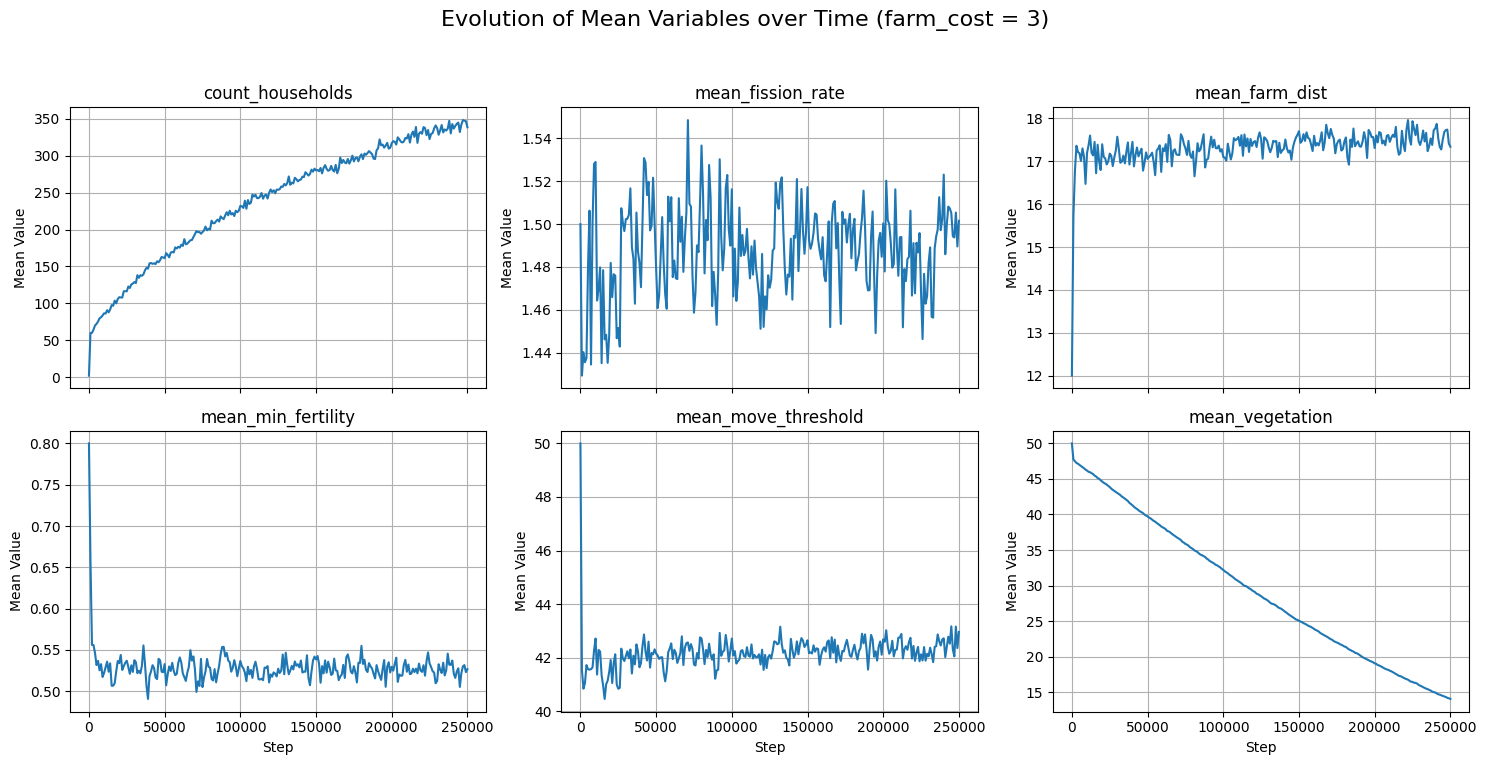

In [6]:
plot_randos_exp("M5Model_Dresslar_randotime_long-table.csv", 3)